## 1. Standard normal distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
# Tich phan integrate
import scipy.integrate as integrate

In [2]:
normal_data = pd.DataFrame(np.random.normal(loc = 0, scale = 1, size = 1000), columns=['data'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ECBDC3C0F0>]],
      dtype=object)

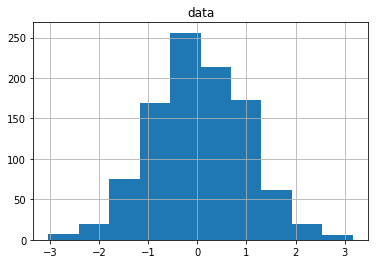

In [3]:
normal_data.hist()

### 1.1 Standard Datatype

In [4]:
normal_data[:10]

,data
0,0.217009
1,-1.197307
2,0.097491
3,0.739165
4,-1.104922
5,-1.329952
6,1.010015
7,-2.012140
8,0.688506
9,0.088744


### 1.2 Standard diviation, variance and Mean 

In [5]:
print('Mean of Standard Normal : '+ str(normal_data.mean()))

Mean of Standard Normal : data    0.028187
dtype: float64


In [6]:
print('Standard diviation value : ' + str(normal_data.std()))

Standard diviation value : data    0.964413
dtype: float64


In [7]:
print('Variance value : ' + str(normal_data.var()))

Variance value : data    0.930093
dtype: float64


### Kết luận :
#### Mean of Standard Normal distribution always 0.
#### Standard diviation and Variance always 1.

In [8]:
normal_data['temp'] = [1]*len(normal_data)
normal_data['data_round'] = normal_data['data'].round(1)

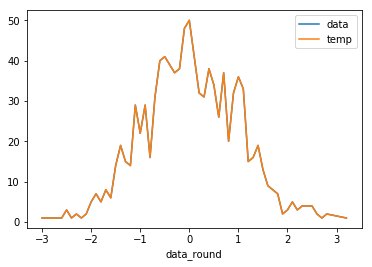

In [9]:
normal_data.groupby('data_round').count().plot()

## 2. Probability density function (Kí hiệu : PDF)

\begin{equation*}
P(x) = \frac{e^\frac{-x^2}{2}}{\sqrt{2\pi}}
\end{equation*}

In [10]:
def probability_dinsity(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

In [11]:
discrete_value1 = pd.DataFrame(normal_data['data'].round(0))
discrete_value1['temp'] = len(discrete_value1) * [1]
discrete_value_distribute = discrete_value1.groupby('data').count() / len(discrete_value1) 

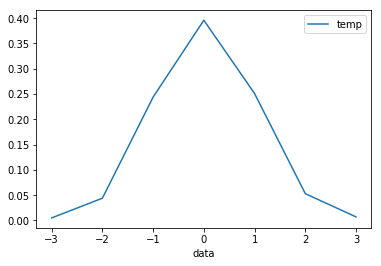

In [12]:
discrete_value_distribute.plot()

In [13]:
print('Xác xuất tại P(0) theo công thức PDF : ' + str(probability_dinsity(0)))

Xác xuất tại P(0) theo công thức PDF : 0.3989422804014327


In [14]:
discrete_value_distribute

,temp
data,
-3.0,0.005
-2.0,0.044
-1.0,0.244
0.0,0.396
1.0,0.251
2.0,0.053
3.0,0.007


## 3. Cumulative distribution function (Phân phối tích lũy) . CDF 


\begin{equation*}
KH: {\displaystyle \Phi}
\end{equation*}

\begin{equation*}
\Phi (x)=F(x;0,1)={\frac  {1}{{\sqrt  {2\pi }}}}\int _{{-\infty }}^{x}\exp \left(-{\frac  {x^{2}}{2}}\right)\,dx.
\end{equation*}

In [15]:
def cumulative_function(fx, x1, x2):
    return (1/np.sqrt(2 * np.pi) * (integrate.quad(fx, x1, x2)))

def f_function(x):
    return np.exp(-x**2 / 2)

In [16]:
Cumulative = pd.DataFrame(normal_data['data'].round(0))
Cumulative['temp'] = len(discrete_value1) * [1]
Cumulative_value_ratio = Cumulative.groupby('data').count() / len(Cumulative) 

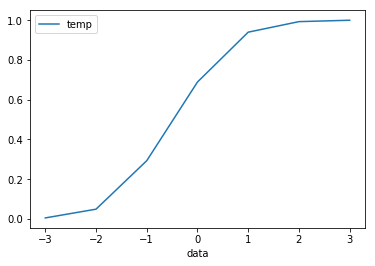

In [17]:
pd.DataFrame(Cumulative_value_ratio.temp.cumsum()).plot()

## 5. Stadardize

Convert from Normal Distribution to Standard Normal Distribution.

Sử dụng Z-Score, chuyển data từ dạng Normal Distribution về dạng Standard Normal Distribution

In [19]:
N = 1000
data_standard = pd.DataFrame(np.sort(np.random.normal(loc = 80, scale = 10, size = N).round()), columns = ['data'])
data_standard['temp'] = [1] * N

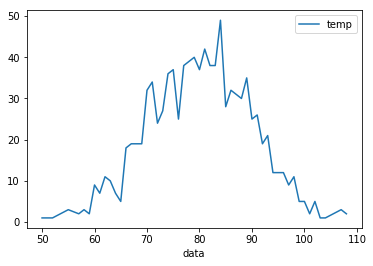

In [20]:
data_standard_decrete = data_standard.groupby('data').count()
data_standard_decrete.plot()

In [21]:
data_standard_decrete[:60]

,temp
data,
50.0,1
51.0,1
52.0,1
55.0,3
57.0,2
58.0,3
59.0,2
60.0,9


### 5.1 Z-Score

Sử dụng Z-Score để chuyển Normal Distribution về dạng Standard Normal Distribution

\begin{equation*}
Z=\frac{x-μ}{σ}
\end{equation*}

In [22]:
mean_data = data_standard.data.mean()
std_data = data_standard.data.std()

data_standard['z-score'] = (data_standard.data - mean_data)/std_data

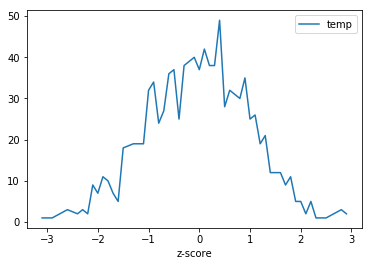

In [23]:
data_descrete = pd.DataFrame(data_standard['z-score'].round(1))
data_descrete['temp'] = len(data_descrete) * [1]

data_descrete.groupby('z-score').count().plot()

### Ứng dụng chuẩn hóa trong thực tế

#### Step 1 : Cho danh sách điểm số sinh viên như kết quả bên dưới

In [24]:
test_score = pd.DataFrame(np.random.normal(loc = 23, scale = 6, size = 30), columns = ['Score']).round()
test_score[:10]

,Score
0,27.0
1,28.0
2,18.0
3,20.0
4,25.0
5,18.0
6,20.0
7,31.0
8,23.0
9,19.0


#### Step 2 
Yêu cầu : Cứ sinh viên nào < 30 điểm sẽ rớt môn

In [25]:
test_score['Is_Pass'] = [x > 30 for x in test_score.Score]

In [26]:
pass_num = test_score['Is_Pass'].sum()
print('Số lượng sinh viên pass môn học : ' + str(pass_num))
print('Số lượng sinh viên rớt môn : '+ str(len(test_score) - pass_num))

Số lượng sinh viên pass môn học : 4
Số lượng sinh viên rớt môn : 26


#### Step 3
#### Vấn đề : Số lượng sinh viên rớt quá nhiều, nguyên nhân do đề khó hơn bình thường.
#### Vì vậy cần tính toán lại sao cho chỉ những sinh viên có năng lực kém hơn hẳn so với nhóm 30 sinh viên bị rớt

In [27]:
mean_score = test_score.Score.mean()
std_score = test_score.Score.std()

test_score['z_score'] = (test_score.Score - mean_score) / std_score

test_score['z_score_is_pass'] = [x > -1 for x in test_score['z_score']]

In [28]:
test_score

,Score,Is_Pass,z_score,z_score_is_pass
0,27.0,False,0.801683,True
1,28.0,False,0.973472,True
2,18.0,False,-0.744420,True
3,20.0,False,-0.400841,True
4,25.0,False,0.458105,True
5,18.0,False,-0.744420,True
6,20.0,False,-0.400841,True
7,31.0,True,1.488840,True
8,23.0,False,0.114526,True
9,19.0,False,-0.572631,True


In [29]:
pass_num = test_score['z_score_is_pass'].sum()
print('Số lượng sinh viên pass môn học : ' + str(pass_num))
print('Số lượng sinh viên rớt môn : '+ str(len(test_score) - pass_num))

Số lượng sinh viên pass môn học : 25
Số lượng sinh viên rớt môn : 5
